**Air Quality India (2015-2020) project**

**1) The dataset is a collection of pollutant readings across cities in India recorded between 2015 and 2020. The data consists of 26 cities in India, and is split into the following categories: -**

  
	City - 26 cities               
	Date - daily readings between 2015 and 2020
	PM2.5 - Particulate Matter 2.5-micrometer in ug / m3
	PM10 - Particulate Matter 10-micrometer in ug / m3
	NO - Nitric Oxide in ug / m3
	NO2 - Nitric Dioxide in ug / m3
	NOx - Any Nitric x-oxide in ppb
	NH3 - Ammonia in ug / m3
	CO - Carbon Monoxide in mg / m3
	SO2 - Sulphur Dioxide in ug / m3
	O3 - Ozone in ug / m3
	Benzene - Benzene in ug / m3
	Toluene - Toluene in ug / m3
	Xylene - Xylene in ug / m3
	AQI - Air Quality Index
	AQI Bucket - Air Quality Index Bucket (ranging from 'very poor' to 'good')**


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [3]:
from google.colab import files
upload = files.upload()

Saving city_day.csv to city_day.csv


In [4]:
import io
city_day=pd.read_csv(io.BytesIO(upload['city_day.csv']))

**Data Description**

Describe the dataset with head,shape,discribe,info.


In [7]:
city_day.head(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [8]:
city_day.shape

(29531, 16)

In [9]:
city_day.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [10]:
city_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


**Data Cleaning**


In [11]:
city_day.isnull().sum()


City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [12]:
city_day.drop(['Xylene','AQI_Bucket'],axis=1,inplace=True)

In [13]:
city_day = city_day.dropna()
print(city_day)

                City        Date  PM2.5   PM10    NO    NO2    NOx    NH3  \
2010          Aizawl  2020-03-12  31.21  38.66  7.20   1.27  10.65  25.63   
2011          Aizawl  2020-03-13  38.39  46.68  7.19   0.91  10.37  29.16   
2012          Aizawl  2020-03-14  43.23  50.83  7.14   1.07  10.48  28.95   
2013          Aizawl  2020-03-15  33.82  41.03  7.09   0.36   9.73  28.41   
2014          Aizawl  2020-03-16  27.14  35.04  5.63   2.32   8.09  23.98   
...              ...         ...    ...    ...   ...    ...    ...    ...   
29525  Visakhapatnam  2020-06-26   7.63  32.27  5.91  23.27  17.19  11.15   
29526  Visakhapatnam  2020-06-27  15.02  50.94  7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09  3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73  3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97  4.05  29.26  18.80  10.03   

         CO    SO2     O3  Benzene  Toluene   AQI  
2010   0.56   4.22   2.

In [14]:
city_day.isnull().sum()

City       0
Date       0
PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
AQI        0
dtype: int64

In [15]:
city_day.head(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI
2010,Aizawl,2020-03-12,31.21,38.66,7.20,1.27,10.65,25.63,0.56,4.22,2.81,0.01,0.08,52.0
2011,Aizawl,2020-03-13,38.39,46.68,7.19,0.91,10.37,29.16,0.57,4.46,0.18,0.00,0.00,60.0
2012,Aizawl,2020-03-14,43.23,50.83,7.14,1.07,10.48,28.95,0.57,4.53,0.41,0.00,0.00,62.0
2013,Aizawl,2020-03-15,33.82,41.03,7.09,0.36,9.73,28.41,0.48,4.63,0.30,0.00,0.00,70.0
2014,Aizawl,2020-03-16,27.14,35.04,5.63,2.32,8.09,23.98,0.50,4.71,13.02,0.13,0.68,54.0


In [16]:
city_day=city_day.astype({'Date':str})
city_day[['year','month','day']]=city_day.Date.str.split('-',expand=True)

In [17]:
city_day.head(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,year,month,day
2010,Aizawl,2020-03-12,31.21,38.66,7.20,1.27,10.65,25.63,0.56,4.22,2.81,0.01,0.08,52.0,2020,03,12
2011,Aizawl,2020-03-13,38.39,46.68,7.19,0.91,10.37,29.16,0.57,4.46,0.18,0.00,0.00,60.0,2020,03,13
2012,Aizawl,2020-03-14,43.23,50.83,7.14,1.07,10.48,28.95,0.57,4.53,0.41,0.00,0.00,62.0,2020,03,14
2013,Aizawl,2020-03-15,33.82,41.03,7.09,0.36,9.73,28.41,0.48,4.63,0.30,0.00,0.00,70.0,2020,03,15
2014,Aizawl,2020-03-16,27.14,35.04,5.63,2.32,8.09,23.98,0.50,4.71,13.02,0.13,0.68,54.0,2020,03,16


In [18]:
city_day=city_day.astype({'year':'int32','month':'int32','day':'int32'})

In [19]:
city_day.drop(['Date'],axis=1,inplace=True)

In [20]:
city_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10654 entries, 2010 to 29529
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   City     10654 non-null  object 
 1   PM2.5    10654 non-null  float64
 2   PM10     10654 non-null  float64
 3   NO       10654 non-null  float64
 4   NO2      10654 non-null  float64
 5   NOx      10654 non-null  float64
 6   NH3      10654 non-null  float64
 7   CO       10654 non-null  float64
 8   SO2      10654 non-null  float64
 9   O3       10654 non-null  float64
 10  Benzene  10654 non-null  float64
 11  Toluene  10654 non-null  float64
 12  AQI      10654 non-null  float64
 13  year     10654 non-null  int32  
 14  month    10654 non-null  int32  
 15  day      10654 non-null  int32  
dtypes: float64(12), int32(3), object(1)
memory usage: 1.3+ MB


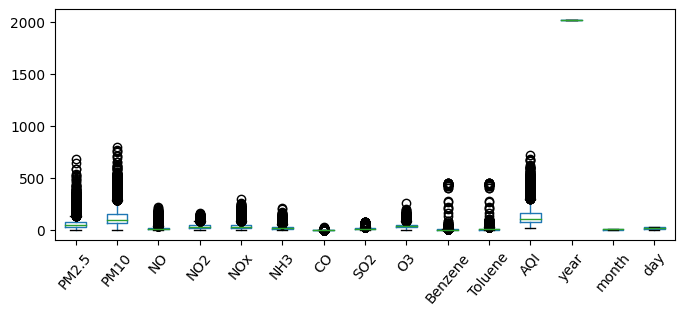

In [21]:
boxplot = city_day.boxplot(figsize = (8,3), rot = 50, fontsize= '10', grid = False)


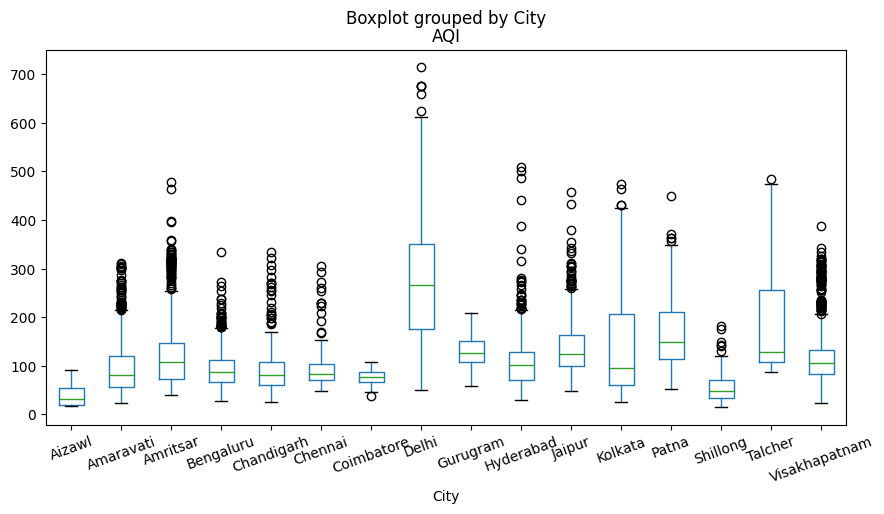

In [22]:
boxplot = city_day.boxplot(by='City' , column =['AQI'] ,figsize = (10,5), rot = 20, fontsize= '10', grid = False)


<Axes: title={'center': 'AQI'}, xlabel='year'>

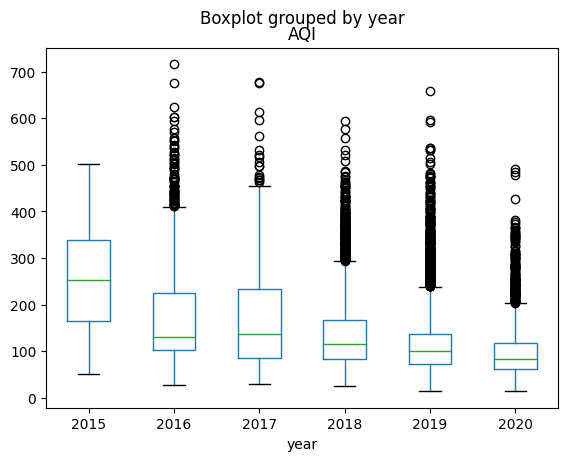

In [23]:
city_day.boxplot(by ='year', column =['AQI'], grid = False)

**The year in which air particle PM2.5 production was highest.**

<Axes: title={'center': 'PM2.5'}, xlabel='year'>

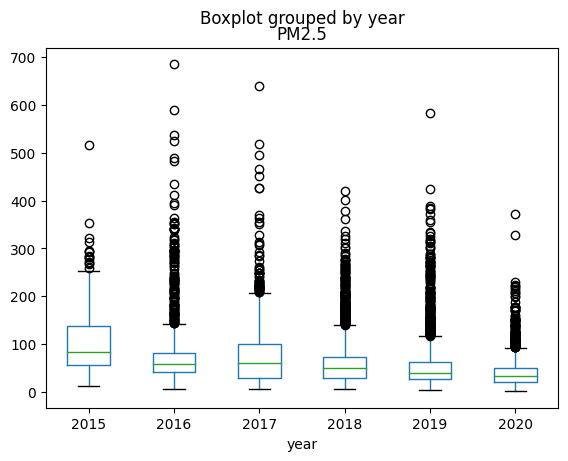

In [24]:
city_day.boxplot(by ='year', column =['PM2.5'], grid = False)

**The month in which ozone production was highest.**

<Axes: title={'center': 'O3'}, xlabel='month'>

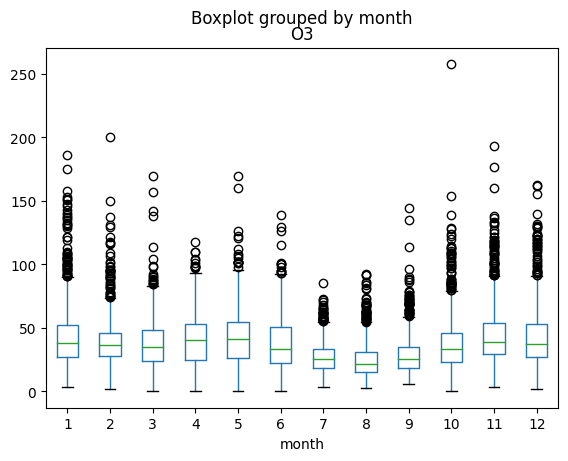

In [25]:
city_day.boxplot(by ='month', column =['O3'], grid = False)

**Top major air pollutant according to world health organisation (WHO)**

<Axes: >

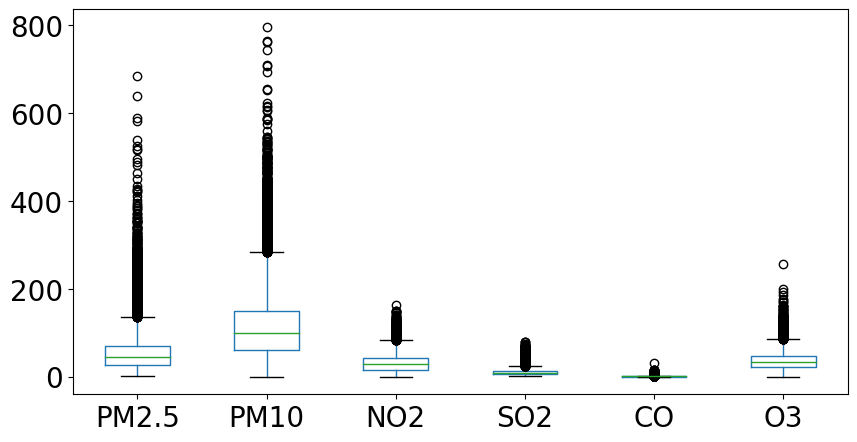

In [26]:
city_day.boxplot(column=['PM2.5','PM10','NO2','SO2','CO','O3'],figsize = (10,5), grid=False, fontsize=20)

In [27]:
city_day.drop(['City'],axis=1,inplace=True)

In [28]:
city_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10654 entries, 2010 to 29529
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PM2.5    10654 non-null  float64
 1   PM10     10654 non-null  float64
 2   NO       10654 non-null  float64
 3   NO2      10654 non-null  float64
 4   NOx      10654 non-null  float64
 5   NH3      10654 non-null  float64
 6   CO       10654 non-null  float64
 7   SO2      10654 non-null  float64
 8   O3       10654 non-null  float64
 9   Benzene  10654 non-null  float64
 10  Toluene  10654 non-null  float64
 11  AQI      10654 non-null  float64
 12  year     10654 non-null  int32  
 13  month    10654 non-null  int32  
 14  day      10654 non-null  int32  
dtypes: float64(12), int32(3)
memory usage: 1.2 MB


In [29]:
city_day= city_day.reindex(['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','year','month','day','AQI'], axis=1)

In [43]:
city_day.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10654 entries, 2010 to 29529
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PM2.5    10654 non-null  float64
 1   PM10     10654 non-null  float64
 2   NO       10654 non-null  float64
 3   NO2      10654 non-null  float64
 4   NOx      10654 non-null  float64
 5   NH3      10654 non-null  float64
 6   CO       10654 non-null  float64
 7   SO2      10654 non-null  float64
 8   O3       10654 non-null  float64
 9   Benzene  10654 non-null  float64
 10  Toluene  10654 non-null  float64
 11  year     10654 non-null  int32  
 12  month    10654 non-null  int32  
 13  day      10654 non-null  int32  
 14  AQI      10654 non-null  float64
dtypes: float64(12), int32(3)
memory usage: 1.2 MB


In [31]:
X = city_day.iloc[ :,0:14].values
Y = city_day['AQI'].values
print(type(Y))
print(type(X))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [32]:
print(X.shape)
print(Y.shape)

(10654, 14)
(10654,)


In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size =1/3,random_state=0)

In [34]:
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('Y_train shape:',Y_train.shape)
print('Y_test shape:',Y_test.shape)

X_train shape: (7102, 14)
X_test shape: (3552, 14)
Y_train shape: (7102,)
Y_test shape: (3552,)


In [35]:
#feature scaling
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
scaled_data = scaler.fit_transform(city_day)
scaled_data = pd.DataFrame(scaled_data,columns=city_day.columns)
print(scaled_data)

          PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
0      0.015439  0.019124  0.003562  0.000628  0.005268  0.012679  0.000277   
1      0.018985  0.023085  0.003556  0.000450  0.005128  0.014421  0.000282   
2      0.021376  0.025134  0.003531  0.000529  0.005182  0.014315  0.000282   
3      0.016724  0.020290  0.003506  0.000178  0.004812  0.014049  0.000237   
4      0.013426  0.017334  0.002785  0.001148  0.004002  0.011863  0.000247   
...         ...       ...       ...       ...       ...       ...       ...   
10649  0.003775  0.015965  0.002924  0.011512  0.008504  0.005516  0.000228   
10650  0.007429  0.025195  0.003799  0.012395  0.009665  0.006168  0.000232   
10651  0.012049  0.036616  0.001690  0.012879  0.008169  0.005925  0.000257   
10652  0.011324  0.032489  0.001705  0.014596  0.009060  0.005294  0.000237   
10653  0.008229  0.024711  0.002003  0.014469  0.009297  0.004960  0.000257   

            SO2        O3   Benzene   Toluene      

In [36]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()
clf.fit(X_train,Y_train)

LinearRegression()

In [37]:
Y_predict=clf.predict(X_test)
print(Y_predict)
print(Y_test)

[266.48362101 101.36494746  79.21340859 ... 155.90410655  72.23486553
 125.32050478]
[340. 106.  54. ... 160.  69.  94.]


In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mae=mean_absolute_error(Y_test,Y_predict)
mse=mean_squared_error(Y_test,Y_predict)
rmse=mean_squared_error(Y_test,Y_predict,squared=False)
print('rmse =',rmse)
r2=r2_score(Y_test,Y_predict)
print('r2 =',r2)


rmse = 28.941842522833145
r2 = 0.9120123088696569


In [39]:
from sklearn import linear_model
X = city_day.iloc[ :,0:1].values
Y = city_day['AQI'].values
print(X.shape)
print(Y.shape)

(10654, 1)
(10654,)


In [40]:
from sklearn import linear_model
ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
response = model.predict(X)

In [41]:
r2 = model.score(X, Y)

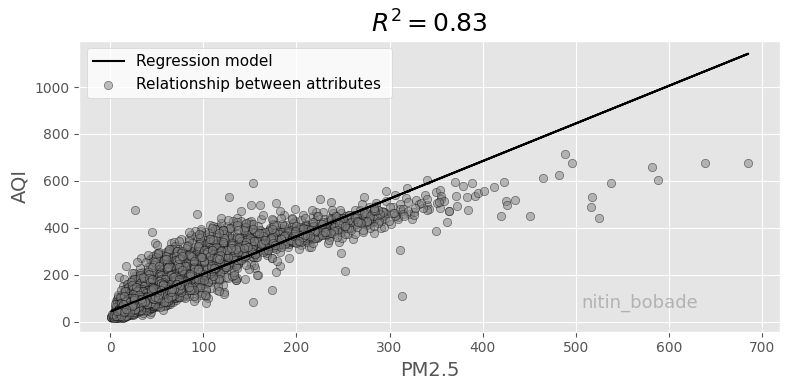

In [42]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='Regression model')
ax.scatter(X,Y,edgecolor='k', facecolor='grey', alpha=0.5, label='Relationship between attributes ')
ax.set_ylabel('AQI', fontsize=14)
ax.set_xlabel('PM2.5', fontsize=14)
ax.text(0.8, 0.1, 'nitin_bobade', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()

conclusion -
In bold text conclusion, this air quality project has provided valuable insights into the dynamics of pollutants and their variations under different circumstances. Through the utilization of various visualization techniques, we were able to observe fluctuations in key pollutants and analyze their trends over time. The application of regression algorithms further enhanced our understanding by quantifying the relationships between different pollutants, as evidenced by the best-fit lines derived from the data.

Moving forward, the insights gained from this project can inform policy decisions and guide interventions aimed at improving air quality standards. Continued research and monitoring efforts will be crucial in addressing the complex challenges associated with environmental pollution and safeguarding the well-being of current and future generations.